In [1]:
import os
import sys
import urllib.request
import re
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
client_id = "6edzCNnNWRuAcEfH4xKc"
client_secret = "T6ZF8xVRNj"
def korean_font():
    plt.rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
    

In [2]:
keywordGroups = []
url = "https://openapi.naver.com/v1/datalab/search"


def get_data(url, startDate, endDate, timeUnit, keywordGroups, device, ages, gender):
    # 데이터 요청 사항 입력
    global client_id, client_secret
    body = json.dumps({
        "startDate": startDate,
        "endDate": endDate,
        "timeUnit": timeUnit,
        "keywordGroups": keywordGroups,
        "device": device,
        "ages": ages,
        "gender": gender
    }, ensure_ascii=False)

    # 불러오기
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        # Json Result
        result = json.loads(response.read())
        df = pd.DataFrame(result['results'][0]['data'])[['period']]
        for i in range(len(keywordGroups)):
            tmp = pd.DataFrame(result['results'][i]['data'])
            tmp = tmp.rename(columns={'ratio': result['results'][i]['title']})
            df = pd.merge(df, tmp, how='left', on=['period'])
        df = df.rename(columns={'period': '날짜'})
        df['날짜'] = pd.to_datetime(df['날짜'])

    else:
        print("Error Code:" + rescode)

    return df


In [3]:
def add_keyword_groups(group_dict):
    global keywordGroups
    keyword_gorup = {
        'groupName': group_dict['groupName'],
        'keywords': group_dict['keywords']
    }        
    keywordGroups.append(keyword_gorup)
    print(f"데이터를 다운 받는 중 입니다.{len(keywordGroups)/5*100}%")

In [4]:
def plot_monthly_trend_line():
    year = df['날짜'][0].year
    fig = plt.figure(figsize=(12,6))
    plt.title(f'{year}년 - 월 별 검색어 트렌드', size=20, loc='center')
    

    sns.lineplot(x='월', y=df.columns[1], label=df.columns[1], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[2], label=df.columns[2], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[3], label=df.columns[3], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[4], label=df.columns[4], data=df, err_style="bars")

    plt.legend(loc='upper right')


In [ ]:
def plot_monthly_rug():
    year = df['날짜'][0].year
    fig = plt.figure(figsize=(12,6))
    plt.title(f'{year}년 - 월 별 검색어 트렌드', size=20, loc='center')
    

    sns.lineplot(x='월', y=df.columns[1], label=df.columns[1], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[2], label=df.columns[2], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[3], label=df.columns[3], data=df, err_style="bars")
    sns.lineplot(x='월', y=df.columns[4], label=df.columns[4], data=df, err_style="bars")

    plt.legend(loc='upper right')

    return fig

In [5]:
def plot_monthly_trend_violin():
    year = df['날짜'][0].year
    fig, axes = plt.subplots(4)
    fig.set_size_inches(10,20)

    
    sns.violinplot(x='월', y=df.columns[1], data=df, kind="kde", ax=axes[0])
    sns.violinplot(x='월', y=df.columns[2], data=df, kind="kde", ax=axes[1])
    sns.violinplot(x='월', y=df.columns[3], data=df, kind="kde", ax=axes[2])
    sns.violinplot(x='월', y=df.columns[4], data=df, kind="kde", ax=axes[3])

    axes[0].set(title=f'{year}년 - 월 별 {df.columns[1]} 트렌드')
    axes[1].set(title=f'{year}년 - 월 별 {df.columns[2]} 트렌드')
    axes[2].set(title=f'{year}년 - 월 별 {df.columns[3]} 트렌드')
    axes[3].set(title=f'{year}년 - 월 별 {df.columns[4]} 트렌드')

In [6]:
keyword_group_set = {
    'keyword_group_1': {'groupName': "관광", 'keywords': ["관광","명소","부산","여행"]},
    'keyword_group_2': {'groupName': "레저", 'keywords': ["레저","부산"]},
    'keyword_group_3': {'groupName': "숙소", 'keywords': ["숙소","분위기","부산"]},
    'keyword_group_4': {'groupName': "음식점", 'keywords': ["음식점","부산"]},
    'keyword_group_5': {'groupName': "시장", 'keywords': ["시장","부산"]}
}

In [7]:
# 요청 파라미터 설정
startDate = "2022-01-01"
endDate = "2022-12-31"
timeUnit = 'date'
device = ''
ages = []
gender = ''

# 데이터 프레임 정의
add_keyword_groups(keyword_group_set['keyword_group_1'])
add_keyword_groups(keyword_group_set['keyword_group_2'])
add_keyword_groups(keyword_group_set['keyword_group_3'])
add_keyword_groups(keyword_group_set['keyword_group_4'])
add_keyword_groups(keyword_group_set['keyword_group_5'])

df = get_data(url, startDate, endDate, timeUnit, keywordGroups, device, ages, gender)
df['월'] = df['날짜'].apply(lambda x: x.month)
df

데이터를 다운 받는 중 입니다.20.0%
데이터를 다운 받는 중 입니다.40.0%
데이터를 다운 받는 중 입니다.60.0%
데이터를 다운 받는 중 입니다.80.0%
데이터를 다운 받는 중 입니다.100.0%


,날짜,관광,레저,숙소,음식점,시장,월
0,2022-01-01,25.81114,16.37664,18.28895,21.25274,19.29328,1
1,2022-01-02,22.70183,13.97036,15.39076,18.12498,16.15528,1
2,2022-01-03,22.61370,14.25116,15.88472,17.98766,15.80479,1
3,2022-01-04,21.83074,13.80229,15.33542,17.60437,15.28213,1
4,2022-01-05,21.96601,14.39873,16.09174,18.07784,15.74330,1
...,...,...,...,...,...,...,...
360,2022-12-27,20.33450,12.67908,15.15915,18.36889,14.15482,12
361,2022-12-28,20.13158,12.57455,15.17760,17.91797,14.16097,12
362,2022-12-29,19.77084,12.61964,15.04847,18.05734,14.25731,12
363,2022-12-30,19.10061,12.35319,14.93779,18.91819,14.12203,12


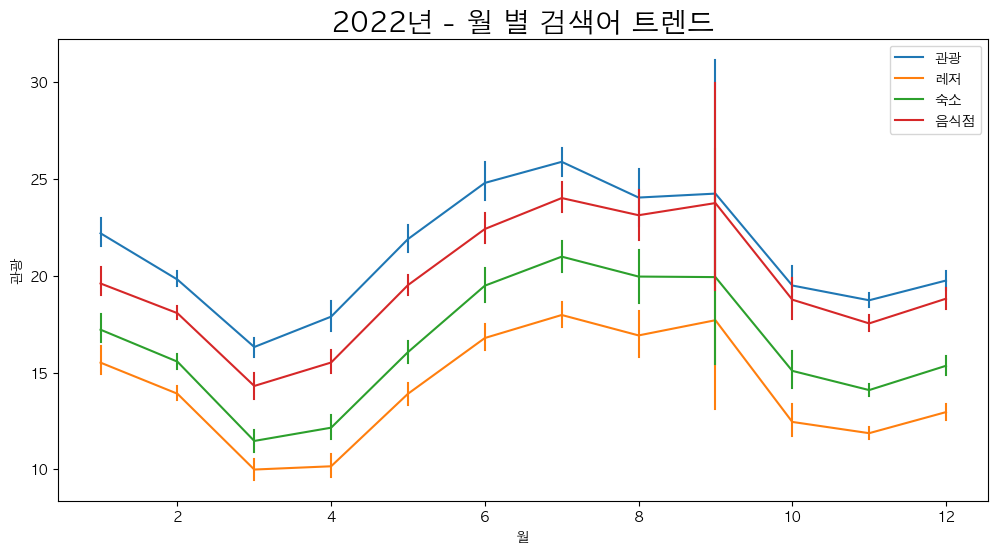

In [8]:
korean_font()
plot1 = plot_monthly_trend_line()


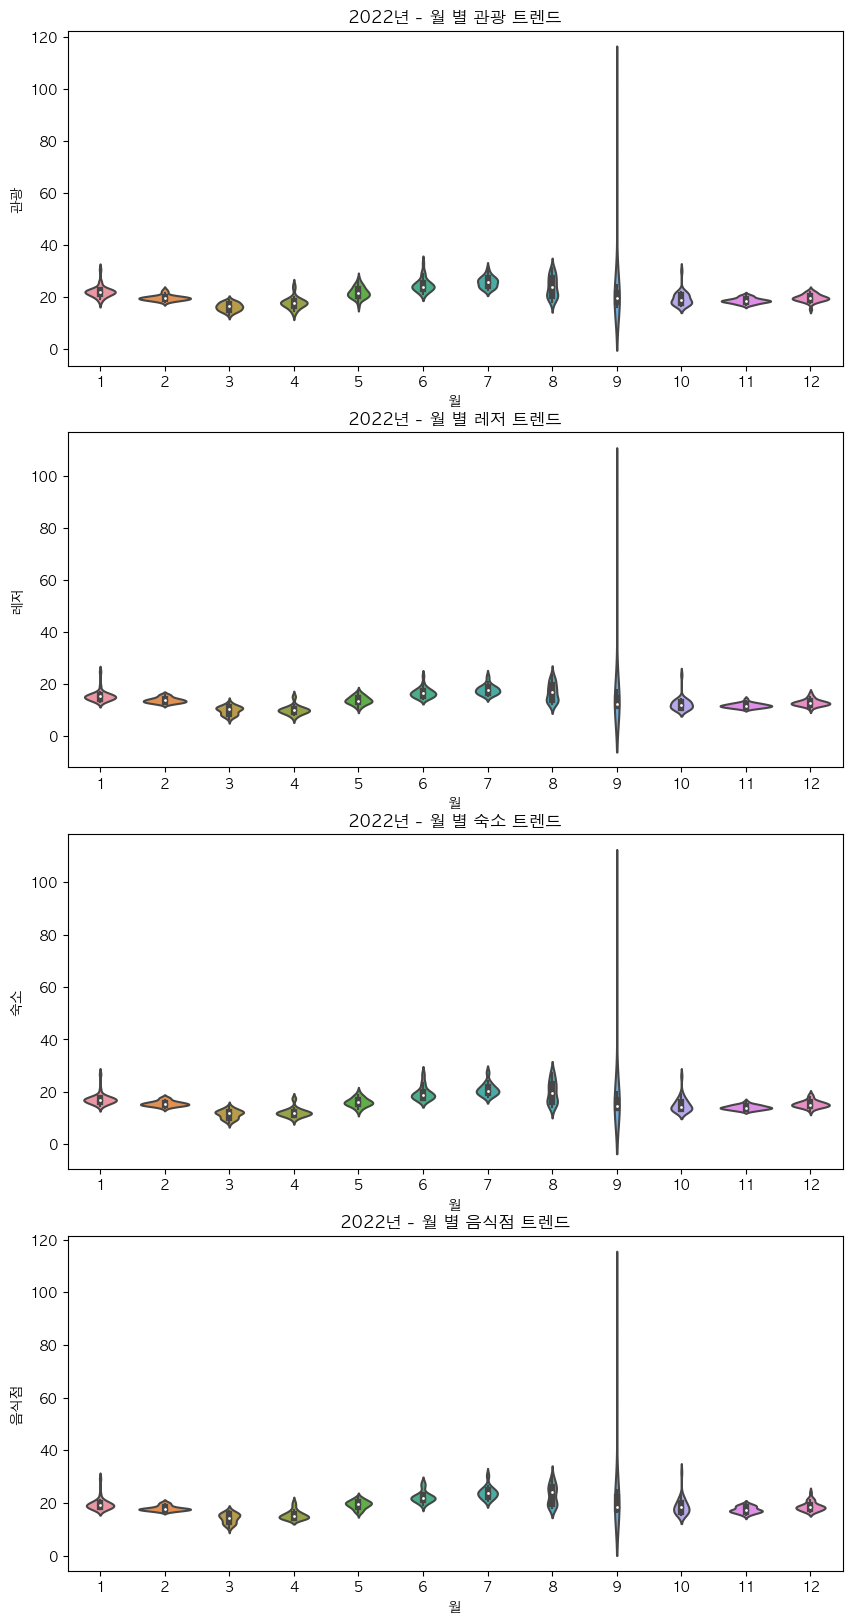

In [9]:
plot2 = plot_monthly_trend_violin()